In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from dataset import Dataset

#I_scale = 10.0
I_scale = 1.0
dataset = Dataset(scale=I_scale)

In [25]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [34]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

#k1 = 0.0005 # rの学習率
#k2 = 0.001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.005 # Uの学習率

U_scale = 7.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

iteration = 30

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.000998151623044008 std=1.994159040211148
rs mean=3.925565508653623e-18 std=4.444869579932475e-17
us mean=-0.0007646466506542344 std=1.4890329268265539
rs mean=-0.00012730025628115982 std=0.0015396293019875884
us mean=-0.00064188951767029 std=1.1233626603671834
rs mean=-0.00012520910240709782 std=0.012570386752486229
us mean=-0.0004794289028475355 std=0.85669701715108
rs mean=-0.00154430593829602 std=0.016397397965192795
us mean=-0.0003269386240342927 std=0.6596859511902389
rs mean=7.06541945040334e-18 std=1.0840266116722962e-16
us mean=-0.00025213816839152756 std=0.513224457019145
rs mean=-0.0005810654838569462 std=0.007422711234539747
us mean=-0.0018561939296622303 std=0.42869480188212594
rs mean=-0.002120708115398884 std=0.19053305685520172
us mean=-0.008648605604533365 std=0.4521992162533225
rs mean=-0.016583146527409554 std=0.15128526091575623
us mean=-0.00664795542348569 std=0.4612085685151809
rs mean=-0.004437003750354052 std=0.0965597927570343
us mean=-0.0066695990110

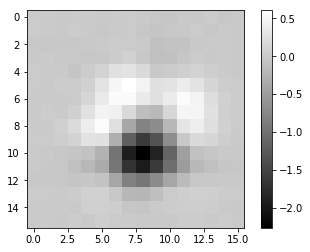

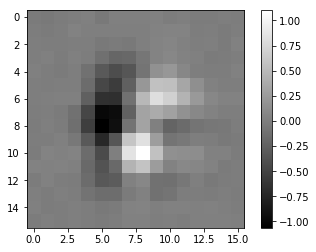

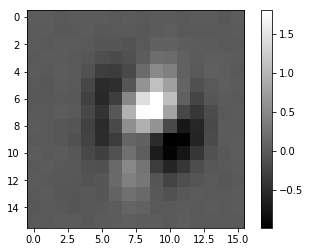

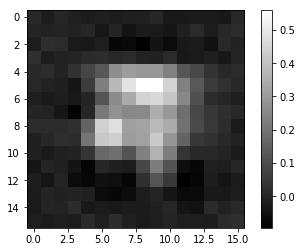

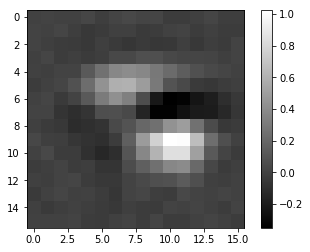

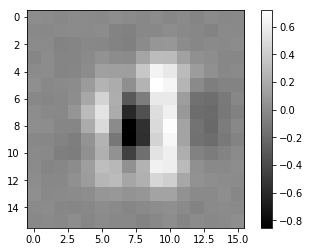

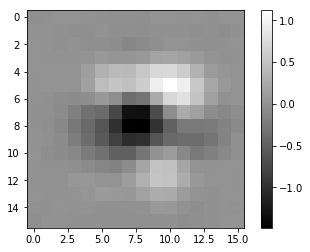

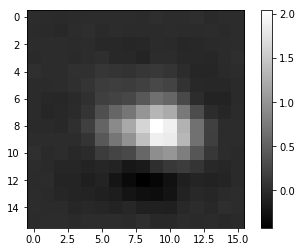

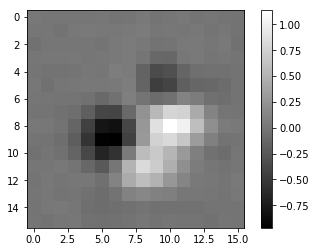

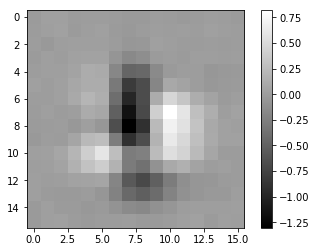

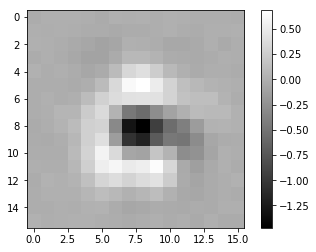

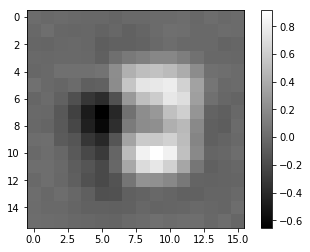

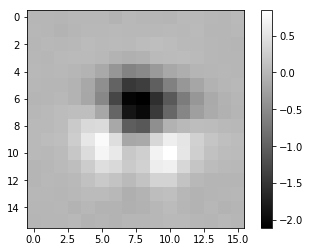

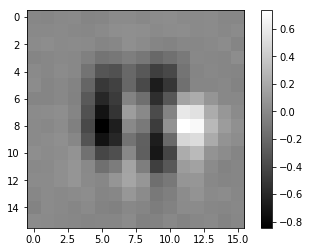

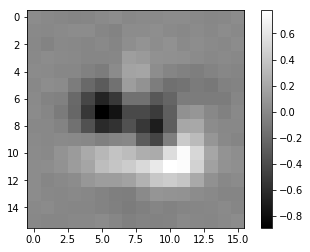

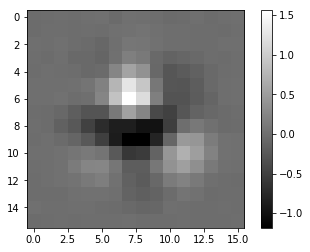

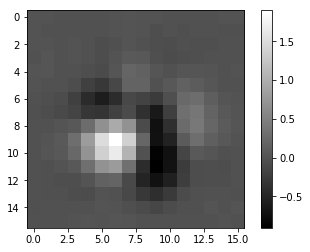

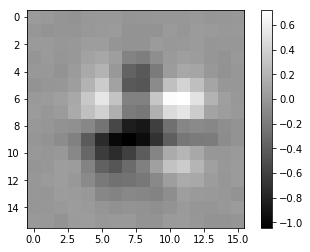

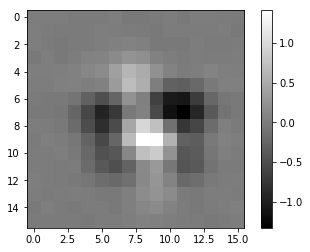

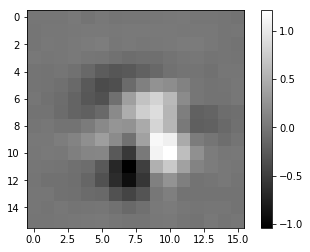

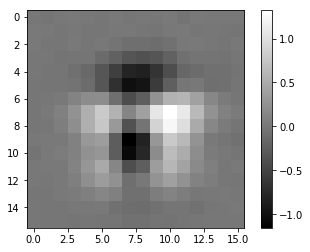

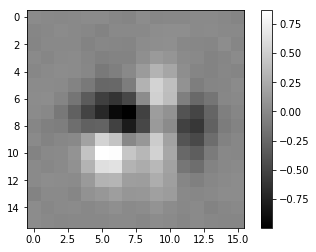

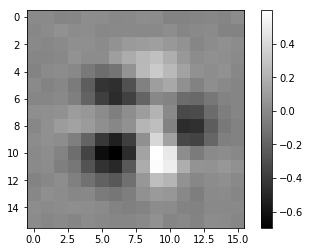

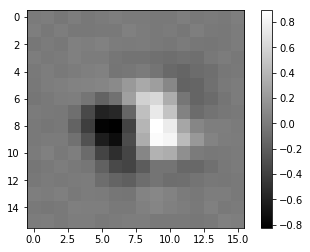

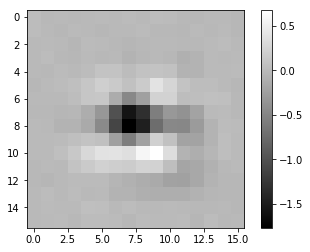

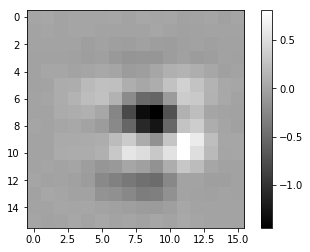

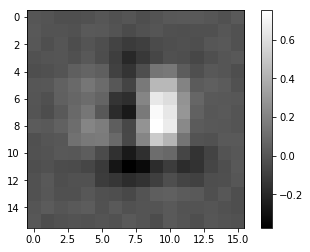

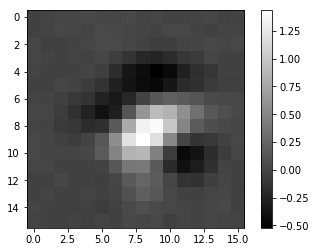

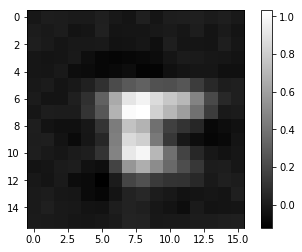

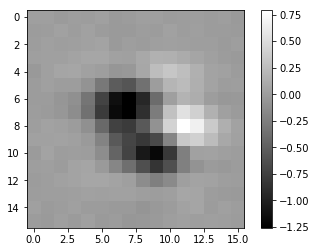

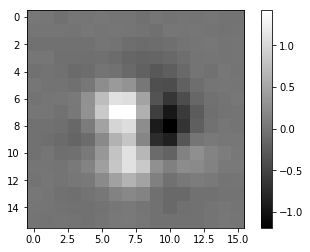

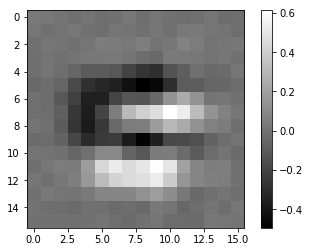

In [35]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

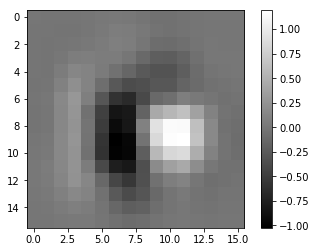

In [23]:
I = dataset.get_image(505, 0)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[ 0.02347494 -0.02445531 -0.00745897 -0.03080319  0.05262022  0.00154086
 -0.0408588   0.00099921 -0.00891403  0.0127267   0.02953404 -0.0106239
 -0.00200362  0.01504526 -0.01936326  0.00788491  0.03131503 -0.0331447
  0.02087692  0.01436189  0.04707455 -0.01503213  0.00984158  0.02787559
  0.01978836 -0.04113233  0.0084716   0.01391188 -0.00684283 -0.00332606
  0.0114692  -0.03208867]


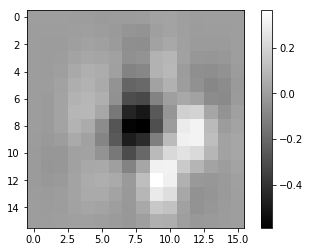

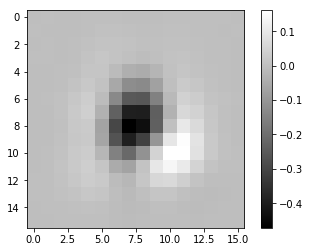

In [36]:
image_index = 506
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(30):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()